In [1]:
import pandas as pd
import sklearn
import joblib

print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)


pandas version: 2.2.3
scikit-learn version: 1.6.1
joblib version: 1.4.2


In [2]:
import numpy as np
print("numpy version:", np.__version__)


numpy version: 2.2.2


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

In [4]:
# Load the dataset
df = pd.read_csv("weed_specific_extended_dataset.csv")

In [5]:
# Remove any leading/trailing spaces from column names (if needed)
df.columns = df.columns.str.strip()

In [6]:
# Print the column names to verify
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Weed Name', 'Soil Type', 'Growth Stage', 'Temp (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)', 'Humidity (%)', 'Herbicide Name', 'Application Rate (L/ha)', 'Success Rate (%)']


In [7]:
# Define feature and target columns based on the dataset preview
feature_cols = [
    "Weed Name", 
    "Soil Type", 
    "Growth Stage",
    "Temp (°C)", 
    "Humidity (%)", 
    "Wind Speed (km/h)", 
    "Rainfall (mm)"
]
target_reg = "Application Rate (L/ha)"   # Regression target
target_clf = "Herbicide Name"              # Classification target

In [8]:
# Separate features and targets
X = df[feature_cols]
y_reg = df[target_reg]
y_clf = df[target_clf]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

In [10]:
# Define which features are numeric and which are categorical
numeric_features = ["Temp (°C)", "Humidity (%)", "Wind Speed (km/h)", "Rainfall (mm)"]
categorical_features = ["Weed Name", "Soil Type","Growth Stage"]

In [11]:
# Create preprocessing pipelines for both types of features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Create a pipeline for the regression model (Application Rate prediction)
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [14]:
# Create a pipeline for the classification model (Herbicide prediction)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [15]:
# Train the regression model
reg_pipeline.fit(X_train, y_reg_train)
print("\nRegression model trained.")


Regression model trained.


In [16]:
# Train the classification model
clf_pipeline.fit(X_train, y_clf_train)
print("Classification model trained.")

Classification model trained.


In [17]:
# Sample predictions to verify models (optional)
reg_pred = reg_pipeline.predict(X_test)
clf_pred = clf_pipeline.predict(X_test)

In [18]:
print("\nSample predictions for Application Rate (regression):", reg_pred[:5])
print("Sample predictions for Herbicide Name (classification):", clf_pred[:5])


Sample predictions for Application Rate (regression): [1.90136703 1.86980473 1.82270481 2.0207086  2.02975172]
Sample predictions for Herbicide Name (classification): ['Glyphosate' 'Atrazine' 'Trifluralin' 'Flumioxazin' 'Glufosinate']


In [19]:
# Save the trained models for later use
joblib.dump(reg_pipeline, 'application_rate_model.pkl')
joblib.dump(clf_pipeline, 'herbicide_model.pkl')
print("\nModels saved as 'application_rate_model.pkl' and 'herbicide_model.pkl'.")


Models saved as 'application_rate_model.pkl' and 'herbicide_model.pkl'.


Dataset columns: ['Weed Name', 'Soil Type', 'Growth Stage', 'Temp (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)', 'Humidity (%)', 'Herbicide Name', 'Application Rate (L/ha)', 'Success Rate (%)']


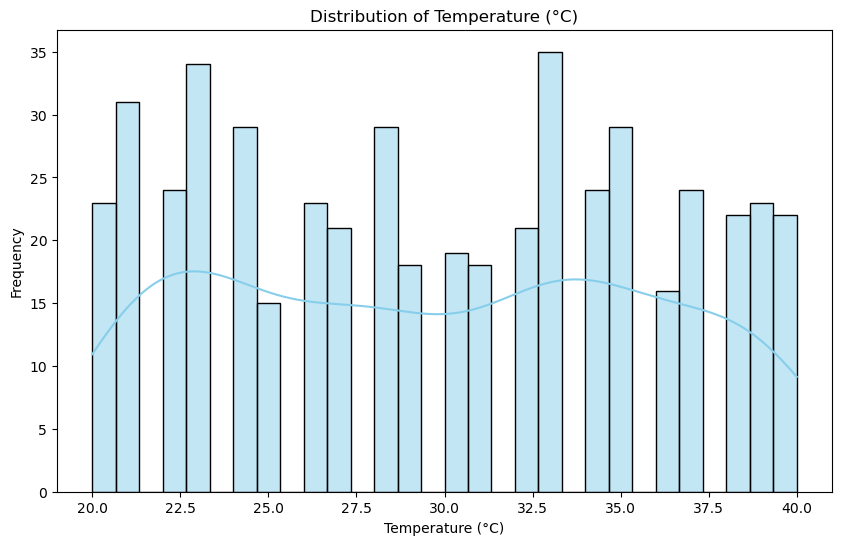

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("weed_specific_extended_dataset.csv")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Preview the columns
print("Dataset columns:", df.columns.tolist())

# 1. Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df["Temp (°C)"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.savefig("temperature_distribution.png")
plt.show()


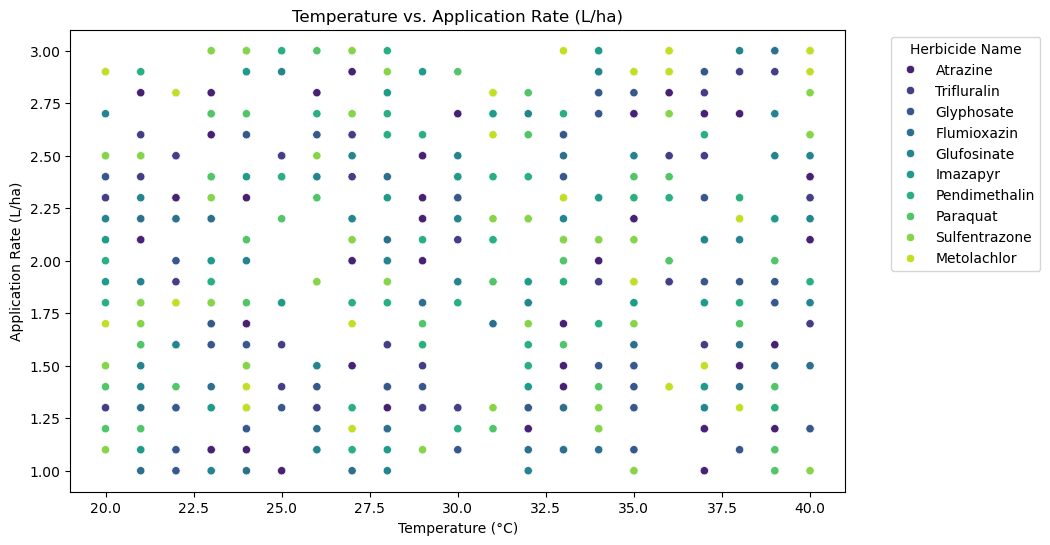

In [28]:

# 2. Scatter Plot: Temperature vs. Application Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Temp (°C)", y="Application Rate (L/ha)", 
                data=df, hue="Herbicide Name", palette="viridis")
plt.title("Temperature vs. Application Rate (L/ha)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Application Rate (L/ha)")
plt.legend(title="Herbicide Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("temp_vs_application_rate.png", bbox_inches="tight")
plt.show()

C:\Users\Thushan\AppData\Local\Temp\ipykernel_14352\2007206285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Weed Name", data=df, order=order, palette="Set2")


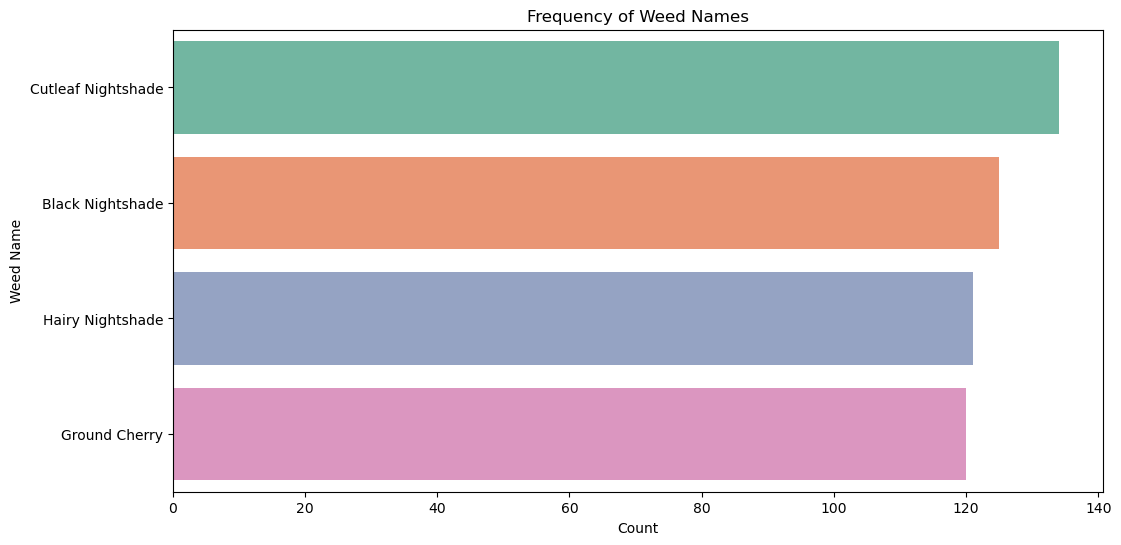

In [29]:

# 3. Count Plot for Weed Names
plt.figure(figsize=(12, 6))
order = df["Weed Name"].value_counts().index  # Order bars by frequency
sns.countplot(y="Weed Name", data=df, order=order, palette="Set2")
plt.title("Frequency of Weed Names")
plt.xlabel("Count")
plt.ylabel("Weed Name")
plt.savefig("weed_name_count.png", bbox_inches="tight")
plt.show()

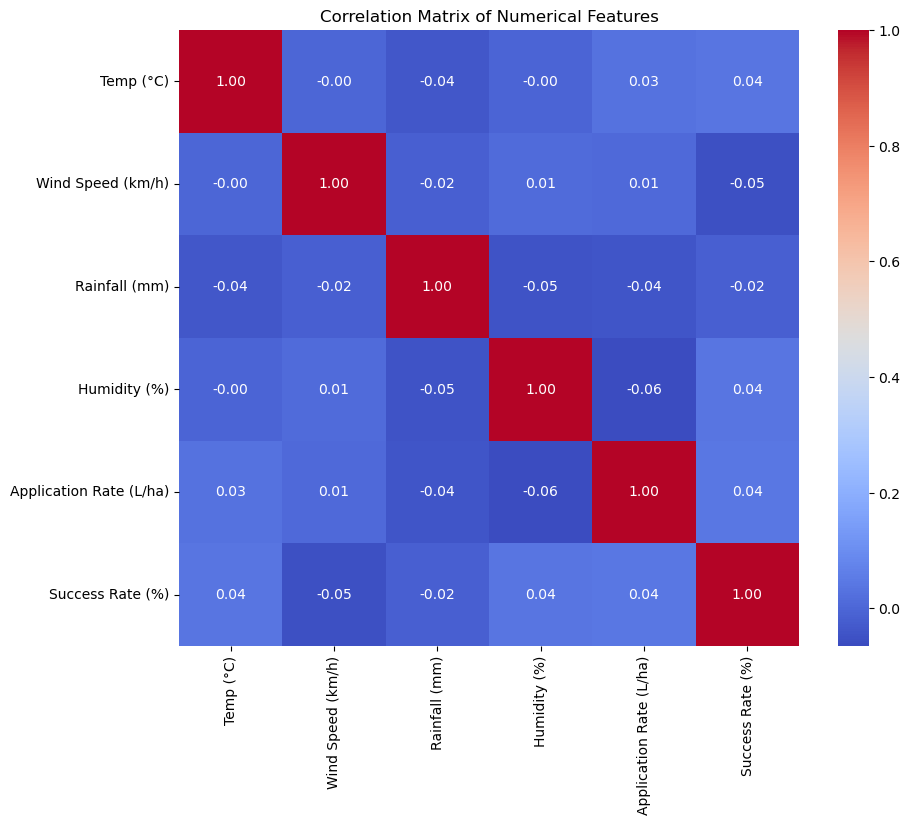

In [30]:
# 4. Correlation Matrix for Numerical Features
numerical_features = ["Temp (°C)", "Wind Speed (km/h)", "Rainfall (mm)", 
                      "Humidity (%)", "Application Rate (L/ha)", "Success Rate (%)"]
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.savefig("correlation_matrix.png", bbox_inches="tight")
plt.show()

C:\Users\Thushan\AppData\Local\Temp\ipykernel_14352\365763953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Herbicide Name", y="Application Rate (L/ha)", data=df, palette="pastel")


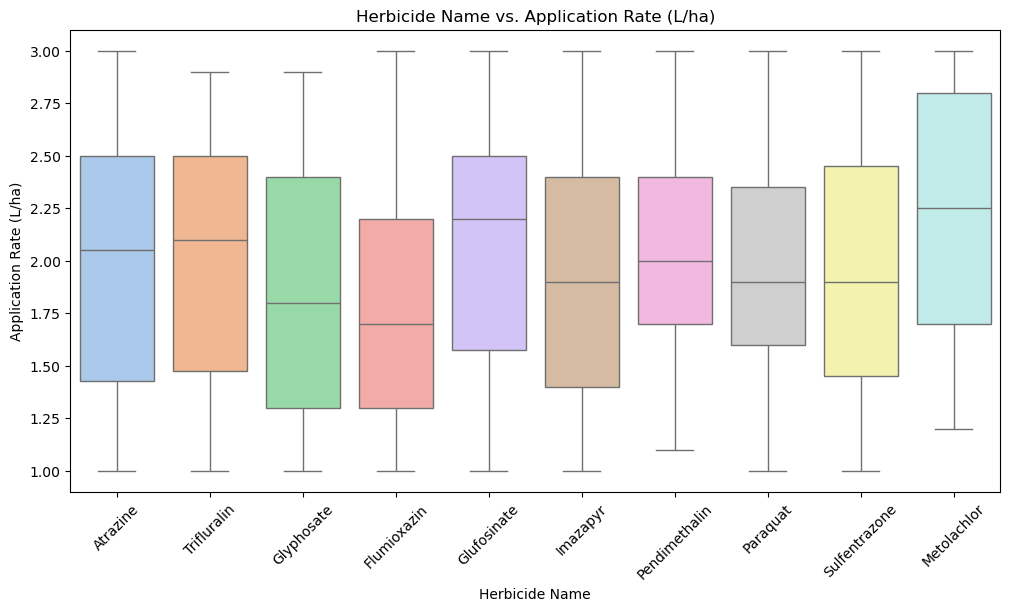

In [31]:
# 5. Boxplot: Herbicide Name vs. Application Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x="Herbicide Name", y="Application Rate (L/ha)", data=df, palette="pastel")
plt.title("Herbicide Name vs. Application Rate (L/ha)")
plt.xlabel("Herbicide Name")
plt.ylabel("Application Rate (L/ha)")
plt.xticks(rotation=45)
plt.savefig("herbicide_vs_application_rate.png", bbox_inches="tight")
plt.show()

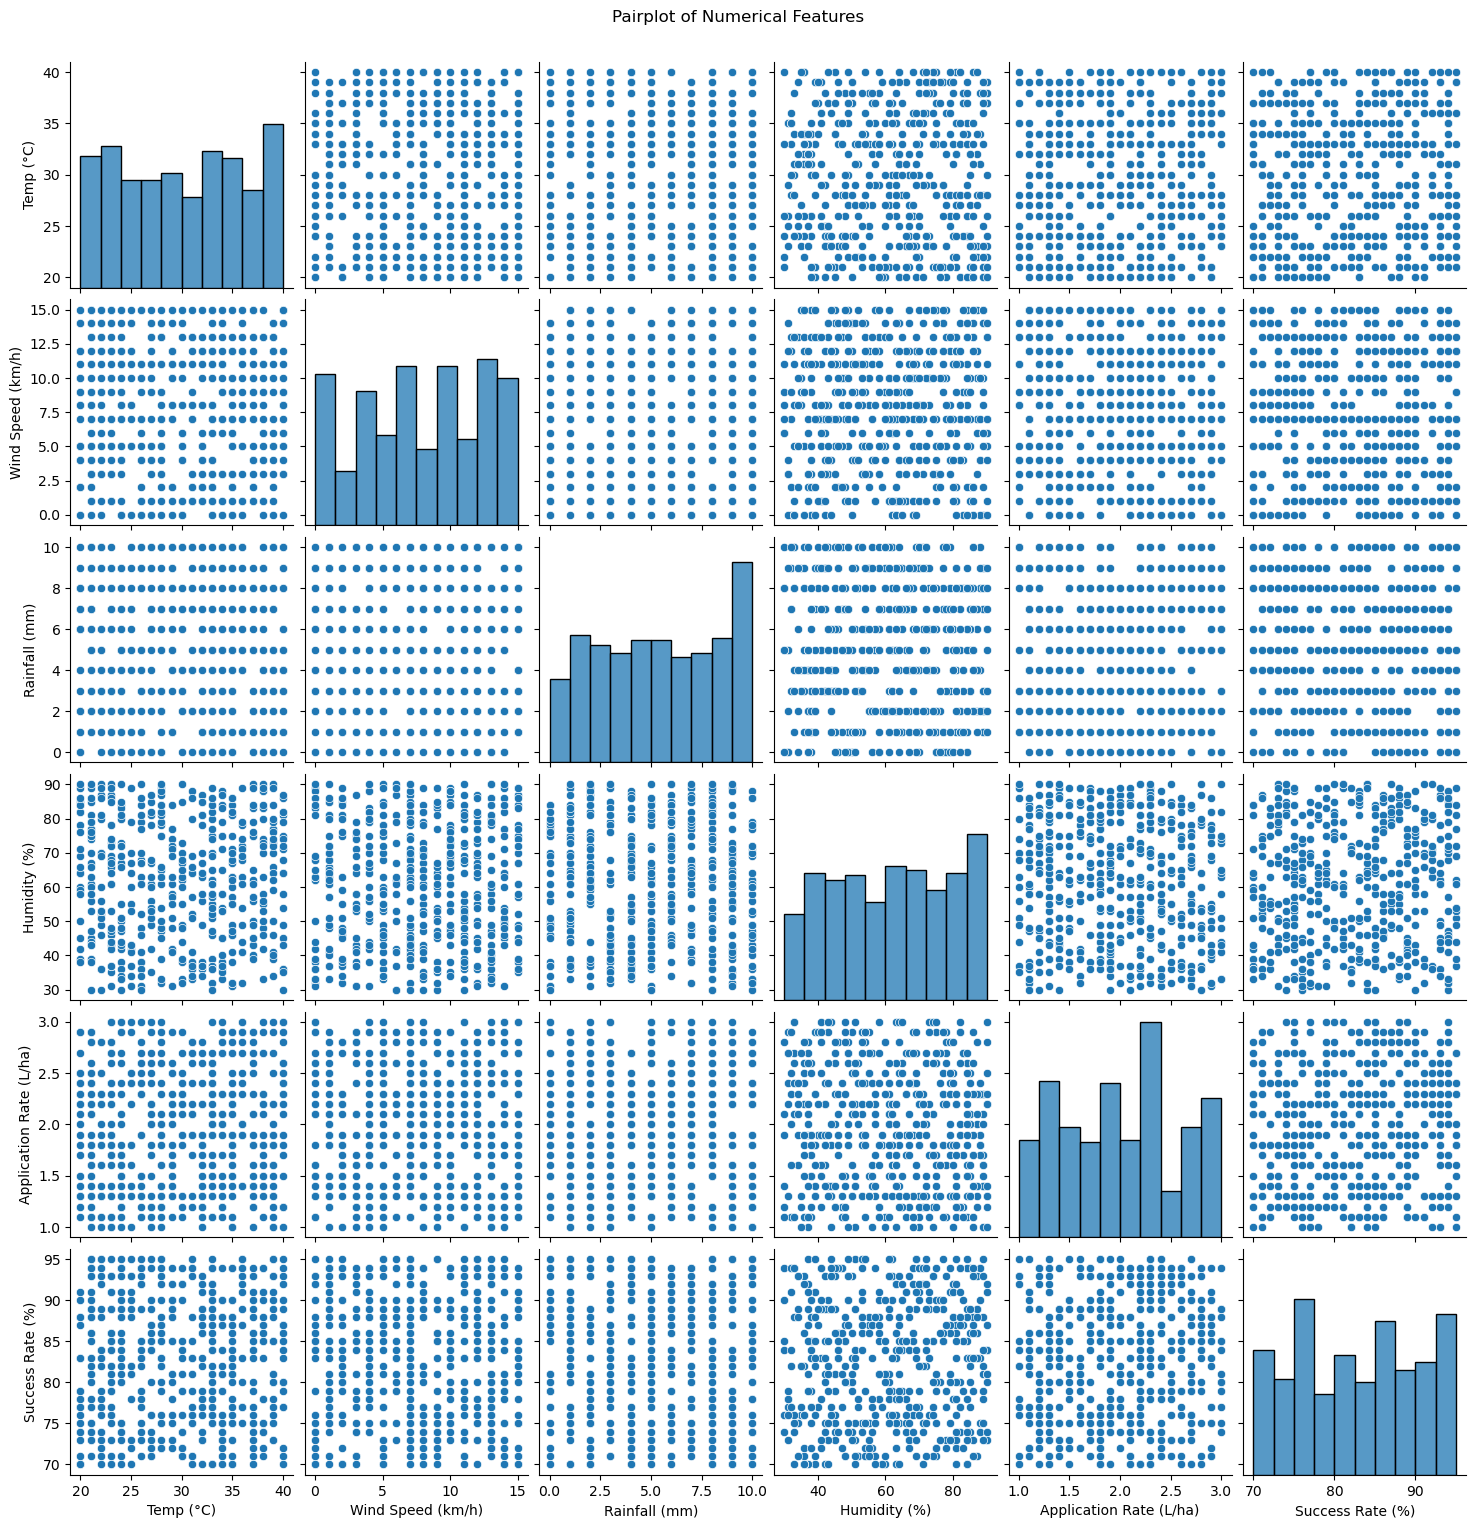

In [32]:
# 6. Pairplot for Numerical Features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.savefig("pairplot_numerical_features.png", bbox_inches="tight")
plt.show()